In [1]:
!pip install hdbscan pymatgen -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
import hdbscan
import os
import json

import sys
sys.path.append('..')
sys.path.append('../autoencoder')


from fastai import *
from fastai.vision.all import *

from src.band_plotters import *
from src.TensorImageNoised import *
from src.transforms import Binarize

sys.path.append('/notebooks/band-fingerprint/autoencoder/resnet_autoencoder')
from model import *

In [3]:
DATA_DIRECTORY = Path("/storage/materials_project/images")

# Select Fingerprint Name and Length Here:

In [4]:
FINGERPRINT_LENGTH = 98
FINGERPRINT_NAME = "224_2channel_resnet_L={0}".format(FINGERPRINT_LENGTH)

# WIDTH=224
PERPLEXITY = 30
OUTPUT_NAME = f"{FINGERPRINT_NAME}_perplexity_{PERPLEXITY}_length_{FINGERPRINT_LENGTH}.csv"
print(FINGERPRINT_NAME)

224_2channel_resnet_L=98


To make a new fingerprint all you need to change is the constants above and/or the calc_fingerprint function below.

# Start with Anupam's list of materials

In [14]:
df_material = pd.read_csv("../fingerprints/materials_project/df_full_structure.csv", index_col="material_id")
fp_cols = list(range(FINGERPRINT_LENGTH))
df_material[fp_cols] = np.nan
df_material = df_material[["formula"]+fp_cols]
df_material.head()

/tmp/ipykernel_301/4028315282.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_material[fp_cols] = np.nan
/tmp/ipykernel_301/4028315282.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_material[fp_cols] = np.nan


,formula,0,1,2,3,4,5,6,7,8,...,88,89,90,91,92,93,94,95,96,97
material_id,,,,,,,,,,,,,,,,,,,,,
mp-7,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-25,N2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-35,Mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-43,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mp-83,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Add Resnet50 Fingerprints

In [ ]:
def run_resnet(material_ids, CNN_model, data_directory=DATA_DIRECTORY):
        image_filenames = [data_directory/f"{material_id}.png" for material_id in material_ids]
        
        # Use the dataloaders to preprocess the input image
        dl = CNN_model.dls.test_dl(image_filenames)
        # Forward pass through the encoder
        with torch.no_grad():
            encoded_representation = CNN_model.model.encoder(dl.one_batch()[0])
        #out = trained_model.encoder(DATA_DIRECTORY/f"images/grayscale_4ev_linewidth3/2dm-4.png")

        
        # flatten encoded 2d array representation of the band structure as the fingerprint
        return encoded_representation.flatten(1).detach().numpy()

# resnet_input_file_type = "grayscale_4ev_linewidth3"
# change path to the location of the desired trained model
model_name = "resnet50"
model_path = f"../autoencoder/models/mp_models/{model_name}.pkl"
resnet_model = load_learner(model_path)

material_ids = ["mp-88", "mp-7"]
fingerprint = run_resnet(material_ids, resnet_model)
print(fingerprint)
assert(len(fingerprint) == len(material_ids))

In [21]:
def divide_chunks(l, n): 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 
        

material_ids = df_material.index.to_list()
chunks = divide_chunks(material_ids, 32)
num_chunks = len(material_ids) // 32

for i, chunk in enumerate(chunks):
    if i % 5 == 0:
        print(i, "/", num_chunks)
    df_material.loc[chunk, fp_cols] = run_resnet(chunk, resnet_model)
    


# for i, material_id in enumerate(df_material.index):
#     if i % 100 == 0:
#         print(i, "/", len(df_material))

#     fingerprint_array[i, :] = fingerprint_functions[FINGERPRINT_NAME](material_id)

# print(fingerprint_array)

0 / 1039
5 / 1039
10 / 1039
15 / 1039
20 / 1039
25 / 1039
30 / 1039
35 / 1039
40 / 1039
45 / 1039
50 / 1039
55 / 1039
60 / 1039
65 / 1039
70 / 1039
75 / 1039
80 / 1039
85 / 1039
90 / 1039
95 / 1039
100 / 1039
105 / 1039
110 / 1039
115 / 1039
120 / 1039
125 / 1039
130 / 1039
135 / 1039
140 / 1039
145 / 1039
150 / 1039
155 / 1039
160 / 1039
165 / 1039
170 / 1039
175 / 1039
180 / 1039
185 / 1039
190 / 1039
195 / 1039
200 / 1039
205 / 1039
210 / 1039
215 / 1039
220 / 1039
225 / 1039
230 / 1039
235 / 1039
240 / 1039
245 / 1039
250 / 1039
255 / 1039
260 / 1039
265 / 1039
270 / 1039
275 / 1039
280 / 1039
285 / 1039
290 / 1039
295 / 1039
300 / 1039
305 / 1039
310 / 1039
315 / 1039
320 / 1039
325 / 1039
330 / 1039
335 / 1039
340 / 1039
345 / 1039
350 / 1039
355 / 1039
360 / 1039
365 / 1039
370 / 1039
375 / 1039
380 / 1039
385 / 1039
390 / 1039
395 / 1039
400 / 1039
405 / 1039
410 / 1039
415 / 1039
420 / 1039
425 / 1039
430 / 1039
435 / 1039
440 / 1039
445 / 1039
450 / 1039
455 / 1039
460 / 1039

In [23]:
#check for NaNs 
fingerprint_array = df_material[fp_cols].values
np.isnan(fingerprint_array).sum()
print(len(fingerprint_array))

33251


# Create T-SNE Reduced Dimension Fingerprints

In [24]:
tsne = manifold.TSNE(n_components=2, early_exaggeration=100.0, init="pca",learning_rate=100, random_state=0, perplexity=PERPLEXITY ,n_iter=10000, verbose=2)
fingerprint_2d = tsne.fit_transform(fingerprint_array)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 33251 samples in 0.037s...
[t-SNE] Computed neighbors for 33251 samples in 5.121s...
[t-SNE] Computed conditional probabilities for sample 1000 / 33251
[t-SNE] Computed conditional probabilities for sample 2000 / 33251
[t-SNE] Computed conditional probabilities for sample 3000 / 33251
[t-SNE] Computed conditional probabilities for sample 4000 / 33251
[t-SNE] Computed conditional probabilities for sample 5000 / 33251
[t-SNE] Computed conditional probabilities for sample 6000 / 33251
[t-SNE] Computed conditional probabilities for sample 7000 / 33251
[t-SNE] Computed conditional probabilities for sample 8000 / 33251
[t-SNE] Computed conditional probabilities for sample 9000 / 33251
[t-SNE] Computed conditional probabilities for sample 10000 / 33251
[t-SNE] Computed conditional probabilities for sample 11000 / 33251
[t-SNE] Computed conditional probabilities for sample 12000 / 33251
[t-SNE] Computed conditional probabilities for sam

/usr/local/lib/python3.9/dist-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 50: error = 985.1131592, gradient norm = 0.0956618 (50 iterations in 15.592s)
[t-SNE] Iteration 100: error = 1068.1101074, gradient norm = 0.0401429 (50 iterations in 25.682s)
[t-SNE] Iteration 150: error = 1072.3759766, gradient norm = 0.0593610 (50 iterations in 37.450s)
[t-SNE] Iteration 200: error = 1108.7727051, gradient norm = 0.0386213 (50 iterations in 26.980s)
[t-SNE] Iteration 250: error = 1125.2347412, gradient norm = 0.0113621 (50 iterations in 21.137s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 1125.234741
[t-SNE] Iteration 300: error = 5.6346130, gradient norm = 0.0020164 (50 iterations in 21.843s)
[t-SNE] Iteration 350: error = 4.4407005, gradient norm = 0.0012132 (50 iterations in 21.246s)
[t-SNE] Iteration 400: error = 3.9810987, gradient norm = 0.0006874 (50 iterations in 18.315s)
[t-SNE] Iteration 450: error = 3.7149999, gradient norm = 0.0004780 (50 iterations in 14.525s)
[t-SNE] Iteration 500: error = 3.5318046, gradient n

# Quick cluster (not saved) and plots to check fingerprint and T-SNE worked

In [25]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='manhattan', cluster_selection_method='leaf', min_cluster_size=4, min_samples=2, p=0.2)
clusterer.fit(fingerprint_array)
labels = clusterer.labels_

Text(0.5, 1.0, 'fingerprint_length=98')

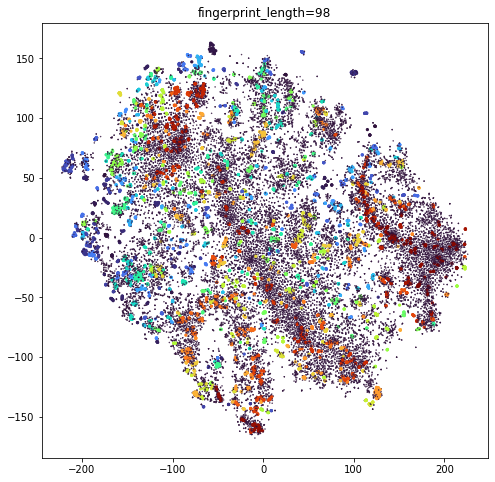

In [26]:
fig, ax  = plt.subplots(figsize=(8,8))
size=np.ones((len(labels),1))*5
size[labels==-1]=0.2

ax.scatter(fingerprint_2d[:,0], fingerprint_2d[:,1],s=size, c=labels*5, cmap="turbo")
plt.title("fingerprint_length={0}".format(FINGERPRINT_LENGTH))

# Add fingerprints, T-SNE to dataframe

In [27]:
df = df_material
df["fx"] = fingerprint_2d[:, 0]
df["fy"] = fingerprint_2d[:, 1]
df["labels"] = labels
df.head()

,formula,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,fx,fy,labels
material_id,,,,,,,,,,,,,,,,,,,,,
mp-7,S,0.0,4.887593,3.711274,3.127839,2.868504,4.655182,7.101266,0.0,4.180010,...,6.917028,5.202119,5.834475,5.254055,5.553651,4.806663,4.873384,74.066353,-27.324135,-1
mp-25,N2,0.0,3.345778,2.643384,2.754066,2.818565,2.807233,5.646141,0.0,2.900623,...,6.826323,5.912625,5.005637,5.678366,4.453766,5.026432,4.728316,135.434158,59.288101,-1
mp-35,Mn,0.0,4.459929,4.223582,3.786164,4.396647,4.970878,6.983392,0.0,4.674497,...,6.001157,4.515999,4.120790,4.723510,4.631126,3.865743,4.561516,-101.274818,87.259605,-1
mp-43,U,0.0,1.953298,2.321727,2.509075,3.220008,4.215698,9.859270,0.0,5.109684,...,6.855273,3.170164,5.183506,5.319691,5.009793,4.937895,5.308202,-2.529418,142.933228,-1
mp-83,S,0.0,6.211008,3.930136,3.739273,4.615800,7.868387,8.408543,0.0,5.301047,...,5.846538,4.436561,4.180757,4.413383,3.480535,3.268553,4.446618,9.459059,-46.066113,-1


In [29]:
# df = df.drop("flat", axis=1)
df.to_csv(f"../fingerprints/materials_project/df_{model_name}.csv")